In [3]:
!pip install pandas scikit-learn matplotlib seaborn jupyterlab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt')

In [5]:
# Adding column names
df.columns = ["Variance", "Skewness", "Kurtosis", "Entropy", "Class"]
df.head()

,Variance,Skewness,Kurtosis,Entropy,Class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [6]:
# Splitting the dataset into features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [7]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
# Initializing and training the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [10]:
# Making predictions
y_pred = model.predict(X_test_scaled)

In [11]:
# Evaluating the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9781818181818182
Precision: 0.9618320610687023
Recall: 0.9921259842519685
F1 Score: 0.9767441860465116
Confusion Matrix:
[[143   5]
 [  1 126]]


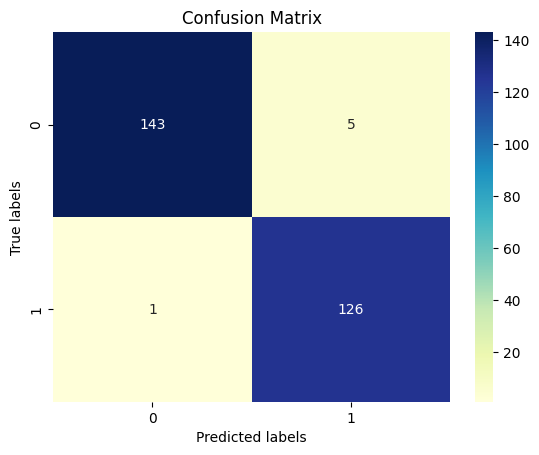

In [12]:
# Visualizing the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Combining original features and predicted labels
df_test = X_test.copy()
df_test['True Class'] = y_test
df_test['Predicted Class'] = y_pred

# Displaying the dataset after classification
print("Dataset after classification:")
df_test.head(1000)

Dataset after classification:


,Variance,Skewness,Kurtosis,Entropy,True Class,Predicted Class
430,1.30870,4.92280,2.00130,0.22024,0,0
588,0.93611,8.64130,-1.63510,-1.30430,0,0
296,1.27060,8.03500,-0.19651,-2.18880,0,0
184,-1.25370,10.88030,1.93100,-4.32370,0,0
244,4.21340,-2.80600,2.01160,0.67412,0,0
...,...,...,...,...,...,...
1081,-1.39460,2.31340,-0.44499,-1.49050,1,1
1099,1.43780,0.66837,-2.02670,1.02710,1,1
620,3.39510,1.14840,2.14010,2.08620,0,0
617,1.85920,3.20740,-0.15966,-0.26208,0,0


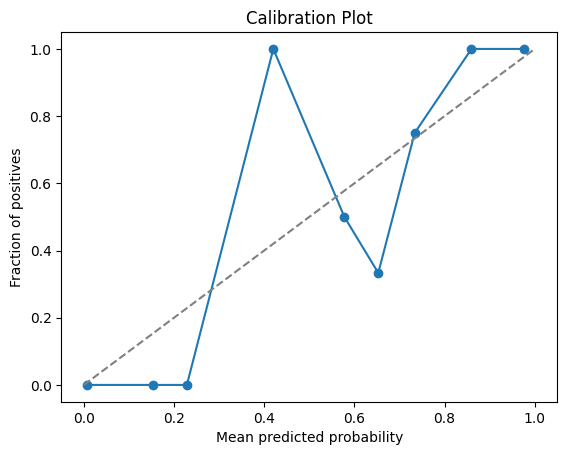

In [14]:
from sklearn.calibration import calibration_curve
prob_true, prob_pred = calibration_curve(y_test, model.predict_proba(X_test_scaled)[:, 1], n_bins=10)
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Plot')
plt.show()

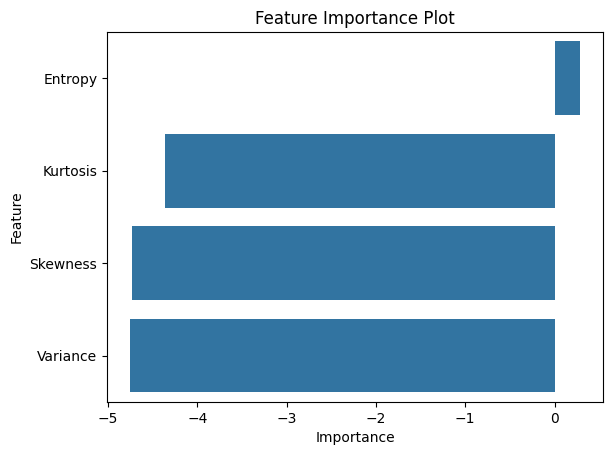

In [23]:
# Visualizing the Feature Importance Plot
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance Plot')
plt.show()

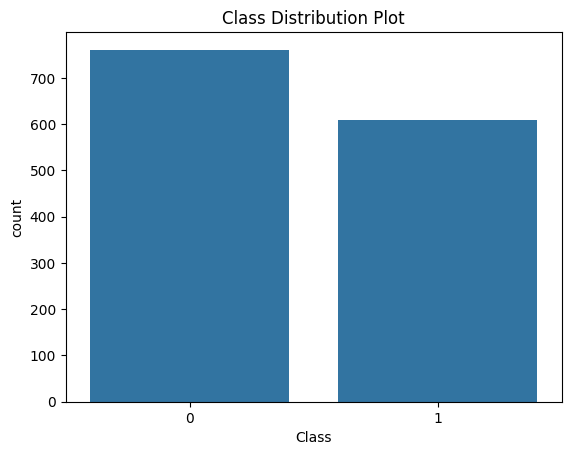

In [25]:
# Visualizing the Class Distribution Plot
sns.countplot(x='Class', data=df)
plt.title('Class Distribution Plot')
plt.show()

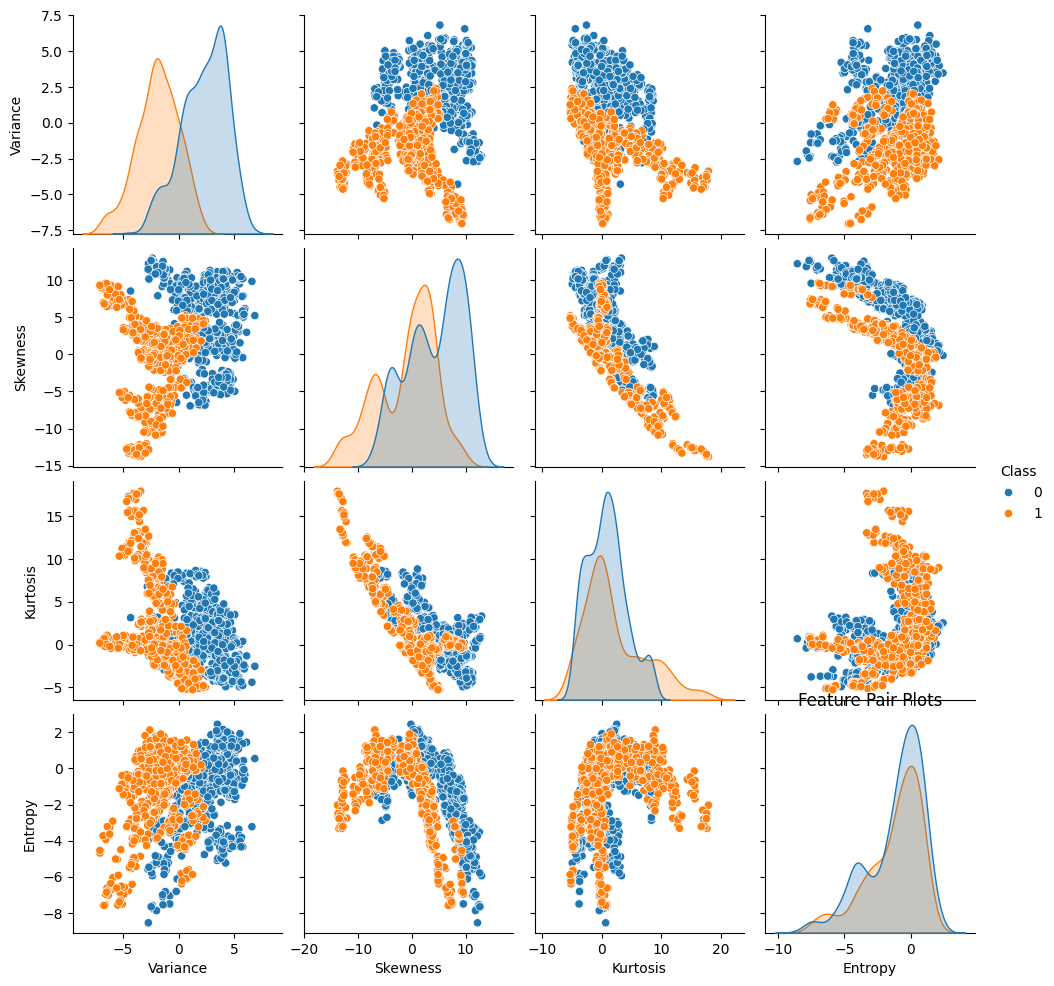

In [26]:
# Visualizing the Feature Pair Plots
sns.pairplot(df, hue='Class')
plt.title('Feature Pair Plots')
plt.show()